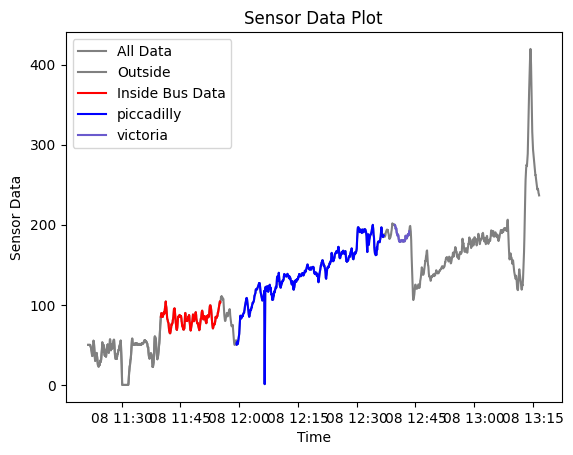

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv("filtered_sensor_data.csv")

df = df.dropna()

# Convert the 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Define the desired time range
# start_time = pd.to_datetime('2023-06-07 22:13:59.586923')
# end_time = pd.to_datetime('2023-06-07 22:25:50.587837')

# Plot all sensor data values
plt.plot(df['time'], df['sensorData'], color='gray', label='All Data')

# Filter the DataFrame based on the time range
bus_start_time = "2023-06-08 11:40:00.515419"
bus_end_time = "2023-06-08 11:55:09.513150"
picc_start_time = "2023-06-08 11:59:18.513071"
picc_end_time = "2023-06-08 12:36:54.508739"
vic_start_time = "2023-06-08 12:39:42.508007"
vic_end_time = "2023-06-08 12:43:24.508037"

filtered_df0 = df.loc[(df['time'] <= bus_start_time)]
filtered_df = df.loc[(df['time'] >= bus_start_time) & (df['time'] <= bus_end_time)]
filtered_df2 = df.loc[(df['time'] >= picc_start_time) & (df['time'] <= picc_end_time)]
filtered_df3 = df.loc[(df['time'] >= vic_start_time) & (df['time'] <= vic_end_time)]
# filtered_df2 = df.loc[(df['time'] >= end_time)]

# Plot the highlighted sensor data values
plt.plot(filtered_df0['time'], filtered_df0['sensorData'], color='gray', label='Outside')
plt.plot(filtered_df['time'], filtered_df['sensorData'], color='red', label='Inside Bus Data')
plt.plot(filtered_df2['time'], filtered_df2['sensorData'], color='blue', label='piccadilly')
plt.plot(filtered_df3['time'], filtered_df3['sensorData'], color='#6a5acd', label='victoria')
# plt.plot(filtered_df2['time'], filtered_df2['sensorData'], color='green', label='Highlighted Data')

plt.xlabel('Time')
plt.ylabel('Sensor Data')
plt.title('Sensor Data Plot')
plt.legend()
plt.savefig("output.svg", format="svg")
plt.show()


In [36]:
import pandas as pd

# Read the CSV file into a DataFrame
data = pd.read_csv("sensor_data.csv")

# Convert values to float and filter based on range
data['sensorData'] = pd.to_numeric(data['sensorData'], errors='coerce')
data = data[(data['sensorData'] >= 0) & (data['sensorData'] <= 500)]

# Remove rows with NaN values
data = data.dropna()

# Write the updated data to a new CSV file
data.to_csv("filtered_sensor_data.csv", index=False)


In [39]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
data = pd.read_csv("sensor_data.csv")

# Convert values to float and filter based on range
data['sensorData'] = pd.to_numeric(data['sensorData'], errors='coerce')
data = data[(data['sensorData'] >= 0) & (data['sensorData'] <= 500)]

# Remove outliers based on threshold
threshold = 15.0  # Adjust the threshold as needed

values = data['sensorData'].values
outliers = np.abs(values - np.roll(values, 1)) > threshold
data.loc[outliers, 'sensorData'] = np.nan

# Remove rows with NaN values
data = data.dropna()

# Write the updated data to a new CSV file
data.to_csv("filtered_sensor_data.csv", index=False)